<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Drexel-logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Ali Bagherzadeh

### MEM680 Final Project

### Predict Fuel Consumption by Multiple Linear Regression


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### importing Data



In [3]:

df = pd.read_csv(r'FuelConsumption.csv')
   

**Did you know?** Our personal vehicles are a major cause of global warming. Collectively, cars and trucks account for nearly one-fifth of all US emissions, emitting around 24 pounds of carbon dioxide and other global-warming gases for every gallon of gas

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

I have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

## The NO 1 Bestselling Car of 2022 in USA (So Far) from https://www.caranddriver.com
## Ford F-Series (467,307 units sold) .

*   **MODELYEAR** e.g. 2022
*   **MAKE** e.g. Ford
*   **MODEL** e.g. F-150
*   **VEHICLE CLASS** e.g. Pickup Truck
*   **ENGINE SIZE** e.g. 3.5
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. AS10
*   **FUELTYPE** e.g. X
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.1
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 11.7
*   **CO2 EMISSIONS (g/km)** e.g. 275   


<h2 id="reading_data">Reading the data in</h2>


In [13]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


# Understanding the table
## Model
    4WD/4X4 = Four-wheel drive
    AWD = All-wheel drive
    FFV = Flexible-fuel vehicle
    SWB = Short wheelbase
    LWB = Long wheelbase
    EWB = Extended wheelbase
## Transmission
    A = automatic
    AM = automated manual
    AS = automatic with select shift
    AV = continuously variable
    M = manual
    3 – 10 = Number of gears
## Fuel type
    X = regular gasoline
    Z = premium gasoline
    D = diesel
    E = ethanol (E85)
    N = natural gas
## Fuel consumption
    City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) 
    the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
## CO2 emissions
    the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving
## CO2 rating
    the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
## Smog rating
    the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)


Let's select some features that we want to use for regression.


In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230
5,2.0,4,11.3,8.1,9.8,231
6,3.0,6,12.3,9.4,11.0,256
7,3.0,6,12.3,9.8,11.2,261
8,2.0,4,10.0,7.2,8.7,205


Let's plot Emission values with respect to Engine size:


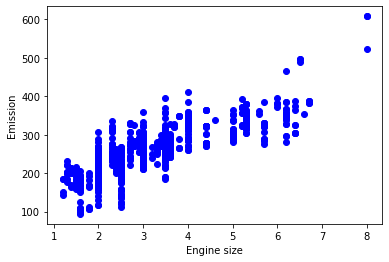

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


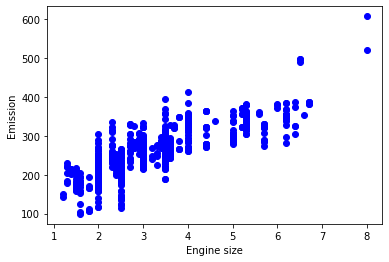

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.33121637  3.57034436 19.48656571]]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>


In [17]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 146.73
Variance score: 0.97


D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.
